### Install & import dependencies

In [37]:
%pip install ndlib --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [38]:
import networkx as nx
from custommodels.SpreadingModels import CascadeModel, ThresholdModel, ClassicalModel
from custommodels.Pickle import pickle, load
import random
import matplotlib.pyplot as plt
import numpy as np


### Load data

In [39]:
path = "../data/loc-brightkite_edges.txt.gz"
G = nx.read_edgelist(path, create_using=nx.Graph())
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)
G = G.subgraph(largest_cc)

# Step 2. Make the disease spread on all four models

1. Adding the the code for the models (threshold and cascade) and the code to import the pickle with degree and betweeness


### Highest degree nodes:

In [40]:
sorted_degree_list = load("sorted_degree")

Found data, loading from picklejar


In [41]:
def top_degree_nodes_percent(percentage):
    top_degree_nodes = []
    n_selected = int(len(sorted_degree_list)*percentage)
    for b in sorted_degree_list[:n_selected]:

        top_degree_nodes.append(str(b[0]))
    return top_degree_nodes

def top_degree_nodes_n(n):
    top_degree_nodes = []
    for b in sorted_degree_list[:n]:
        top_degree_nodes.append(str(b[0]))
    return top_degree_nodes

In [42]:
print(sorted_degree_list)
print("\n")
print(sorted_degree_list[-3-1:-1])

[(40, 1134), (44, 1055), (108, 854), (116, 838), (159, 833), (36, 779), (191, 732), (49, 569), (634, 550), (156, 475), (35, 467), (207, 453), (651, 448), (3245, 404), (250, 386), (2625, 379), (1093, 354), (163, 343), (405, 337), (833, 334), (1100, 333), (27, 332), (212, 327), (112, 326), (6365, 325), (1302, 321), (214, 311), (148, 310), (102, 306), (146, 301), (209, 299), (6991, 296), (1076, 292), (446, 289), (1878, 282), (719, 274), (195, 272), (2812, 271), (176, 270), (1143, 270), (2349, 270), (210, 267), (2896, 267), (1875, 266), (143, 264), (3, 259), (6895, 257), (7170, 256), (30, 254), (676, 253), (2904, 253), (2850, 248), (680, 242), (241, 241), (7, 230), (10346, 230), (174, 228), (1082, 228), (2829, 228), (1386, 227), (1877, 226), (2953, 225), (6923, 225), (2893, 221), (620, 218), (2314, 218), (901, 215), (262, 214), (2880, 214), (6640, 213), (13909, 213), (6589, 212), (301, 211), (144, 210), (161, 210), (229, 210), (1876, 210), (168, 209), (189, 207), (2934, 206), (9574, 206), 

In [43]:
def bottom_degree_nodes_percent(percentage):
    bottom_degree_nodes = []
    n_selected = int(len(sorted_degree_list)*percentage)
    for b in sorted_degree_list[-n_selected-1:-1]:

        bottom_degree_nodes.append(str(b[0]))
    return bottom_degree_nodes

def bottom_degree_nodes_n(n):
    bottom_degree_nodes = []
    for b in sorted_degree_list[-n-1:-1]:
        bottom_degree_nodes.append(str(b[0]))
    return bottom_degree_nodes

### Highest betweeness centrality nodes:

In [44]:
betweenness = (load("betweenness_centrality"))
betweenness = list(betweenness.items())
sorted_betweenness = sorted(betweenness, key=lambda x: x[1], reverse=True)


Found data, loading from picklejar


In [45]:
def top_betweenness_nodes_percent(percentage):
    top_betweenness_nodes = []
    n_selected = int(len(sorted_betweenness)*percentage)
    for b in sorted_betweenness[:n_selected]:

        top_betweenness_nodes.append(str(b[0]))
    return top_betweenness_nodes

def top_betweenness_nodes_n(n):
    top_betweenness_nodes = []
    for b in sorted_betweenness[:n]:

        top_betweenness_nodes.append(str(b[0]))
    return top_betweenness_nodes

### Lowest betweeness centrality nodes: 

In [46]:
def bottom_betweenness_nodes_percent(percentage):
    bottom_betweenness_nodes = []
    n_selected = int(len(sorted_betweenness)*percentage)
    for b in sorted_betweenness[-n_selected-1:-1]:

        bottom_betweenness_nodes.append(str(b[0]))
    return bottom_betweenness_nodes

def bottom_betweenness_nodes_n(n):
    bottom_betweenness_nodes = []
    for b in sorted_betweenness[-n:-1]:

        bottom_betweenness_nodes.append(str(b[0]))
    return bottom_betweenness_nodes

In [47]:
def random_nodes_percent(percentage):
    random_nodes = []
    nodes = list(G.nodes()).copy()
    n_selected = int(len(nodes)*percentage)
    for b in random.sample(nodes, n_selected):
        random_nodes.append(str(b))
    return random_nodes
def random_nodes_n(n):
    random_nodes = []
    nodes = list(G.nodes()).copy()
    for b in random.sample(nodes, n):
        random_nodes.append(str(b))
    return random_nodes

In [48]:
def n_to_percent(n):
    tot_nodes = len(G.nodes())
    return n/tot_nodes

In [49]:
def plot_resulst(results, num_initial_infected):
    final_sus = list(results[-1][0].values()).count(0)
    final_inf = list(results[-1][0].values()).count(1)
    final_rec = list(results[-1][0].values()).count(2)
    print(f"Final susceptible: {final_sus}")
    print(f"Final infected: {final_inf}")
    print(f"Final recovered: {final_rec}")
    # Plotting  the graph
    num_susceptible = [len(G.nodes) - num_initial_infected]
    num_infected = [num_initial_infected]
    num_recovered = [0]
    for state, i, r in results:
        num_susceptible.append(list(state.values()).count(0))
        num_infected.append(list(state.values()).count(1))
        num_recovered.append(list(state.values()).count(2))

    num_susceptible = np.array(num_susceptible)
    num_infected = np.array(num_infected)
    num_recovered = np.array(num_recovered)

    # get proportion
    prop_susceptible = num_susceptible / len(G.nodes)
    prop_infected = num_infected / len(G.nodes)
    prop_recovered = num_recovered / len(G.nodes)

    plt.plot(prop_susceptible, label="Susceptible", color="blue")
    plt.plot(prop_infected, label="Infected", color="red")
    plt.plot(prop_recovered, label="Recovered", color="green")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Number of nodes")
    plt.show()

In [50]:
def plot_infections_degree(results, num_initial_infected):
    final_sus = list(results[-1][0].values()).count(0)
    final_inf = list(results[-1][0].values()).count(1)
    final_rec = list(results[-1][0].values()).count(2)
    print(f"High degree: {final_sus}")
    print(f"Random: {final_inf}")
    print(f"low degree: {final_rec}")
    # Plotting  the graph
    num_infected = [num_initial_infected]
    for state, i, r in results:
        num_infected.append(list(state.values()).count(1))

    num_infected = np.array(num_infected)

    # get proportion
    prop_infected = num_infected / len(G.nodes)

    plt.plot(prop_infected, label="Infected", color="red")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Number of nodes")

In [51]:
cascade_results = ...
threshold_results = ...
classical_results = ...
for result in (cascade_results, threshold_results, classical_results):
    plot_infections_degree(result, num_initial_infected)
    plt.show()

NameError: name 'num_initial_infected' is not defined

## Cascade model infecting top X highest degree nodes 

Final susceptible: 267
Final infected: 6220
Final recovered: 50252


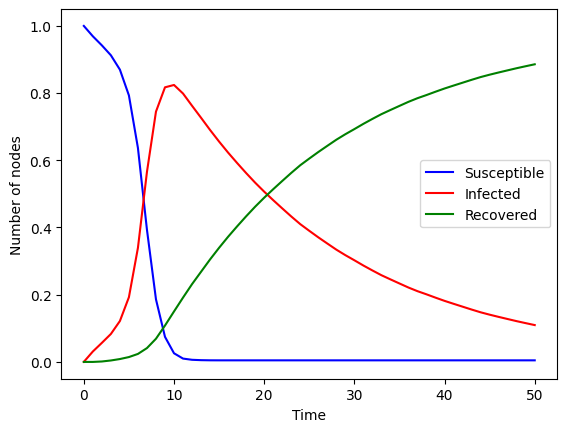

In [52]:
model = CascadeModel(G)
beta, gamma = 0.15, 0.05
model.set_parameters(beta, gamma)

n = 10
p = 0.1
initial_infected = top_degree_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))

High degree: 212
Random: 6340
low degree: 50187


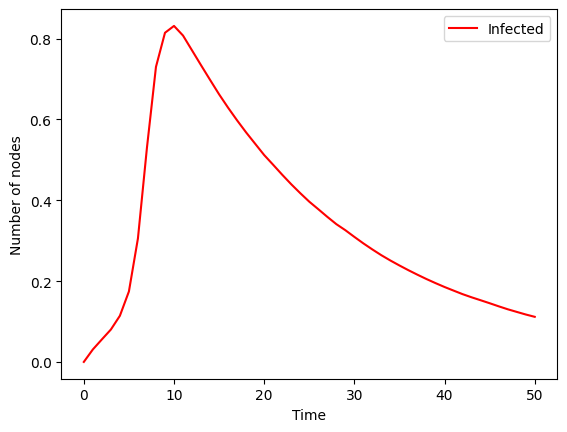

In [ ]:
plot_infections_degree(results, len(initial_infected))

## Threshold model infecting top X highest degree nodes 

Final susceptible: 36745
Final infected: 2148
Final recovered: 17846


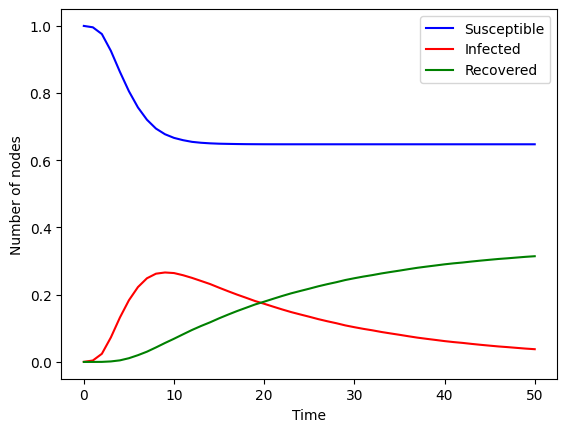

In [ ]:
model = ThresholdModel(G)
theta, beta, gamma = 3, 0.5, 0.05
model.set_parameters(theta, beta, gamma)

n = 10
p = 0.1
initial_infected = top_degree_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))

## Cascade model with top X highest betweeness centrality nodes

Final susceptible: 285
Final infected: 6153
Final recovered: 50301


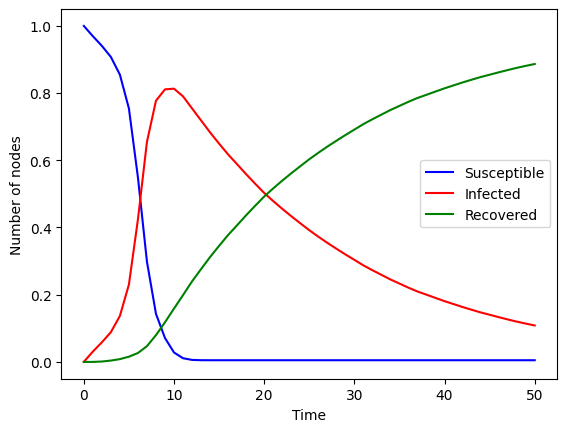

In [ ]:
model = CascadeModel(G)
beta, gamma = 0.15, 0.05
model.set_parameters(beta, gamma)

n = 10
p = 0.1
initial_infected = top_betweenness_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))

## Threshold model with top X highest betweeness centrality nodes

Final susceptible: 37587
Final infected: 2150
Final recovered: 17002


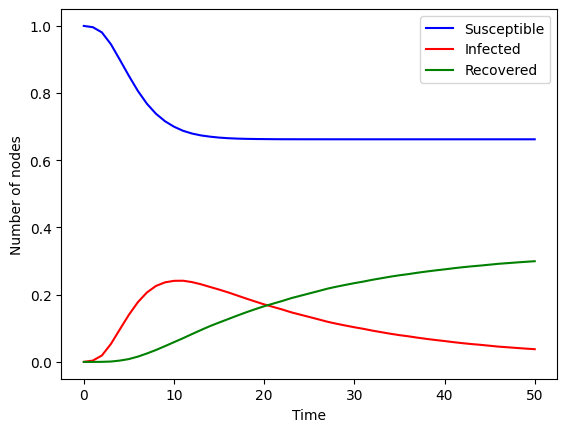

In [61]:
model = ThresholdModel(G)
theta, beta, gamma = 3, 0.4, 0.05
model.set_parameters(theta, beta, gamma)

n = 10
p = 0.1
initial_infected = top_betweenness_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))

Final susceptible: 2428
Final infected: 394
Final recovered: 53917


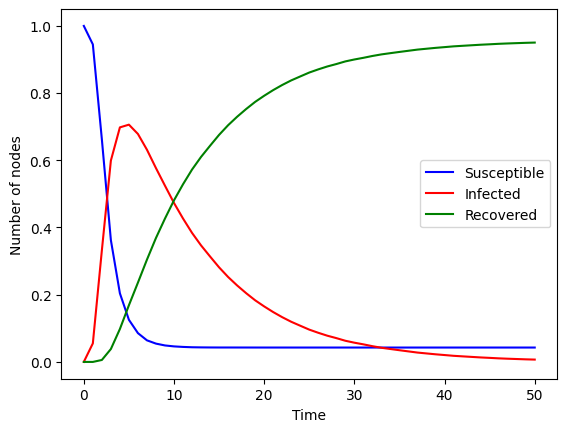

In [ ]:
model = ClassicalModel(G)
theta, beta, gamma = 3, 0.5, 0.1
model.set_parameters(theta, beta, gamma)

n = 10
p = 0.1
initial_infected = top_betweenness_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))

High degree: 725
Random: 18408
low degree: 37606
High degree: 56670
Random: 7
low degree: 62


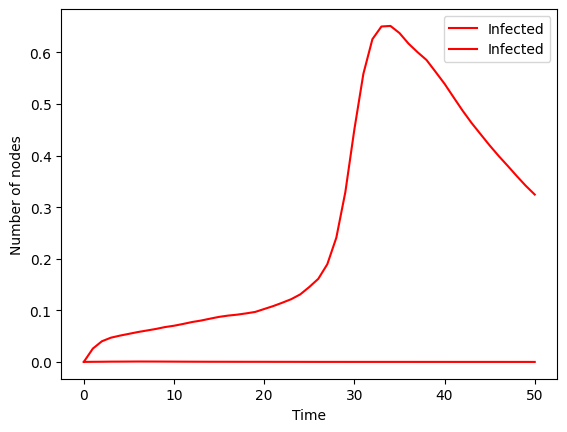

In [59]:
# top degree 
model_topdegree = CascadeModel(G)
beta, gamma = 0.2, 0.05
n = 10
p = 15
model_topdegree.set_parameters(beta, gamma)

initial_infected_topdegree = top_degree_nodes_n(n)

model_topdegree.set_initial_infected(initial_infected_topdegree)
results_topdegree = model_topdegree.iterate(50)
 
# bottom degree 
model_bottomdegree = CascadeModel(G)

model_bottomdegree.set_parameters(beta, gamma)

initial_infected_bottomdegree = bottom_degree_nodes_n(n)

model_bottomdegree.set_initial_infected(initial_infected_bottomdegree)
results_bottomdegree = model_bottomdegree.iterate(50)

# plotting all in 1 
plot_infections_degree(results_topdegree, len(initial_infected_topdegree))
plot_infections_degree(results_bottomdegree, len(initial_infected_bottomdegree))
plt.show()


Final susceptible: 56730
Final infected: 0
Final recovered: 9


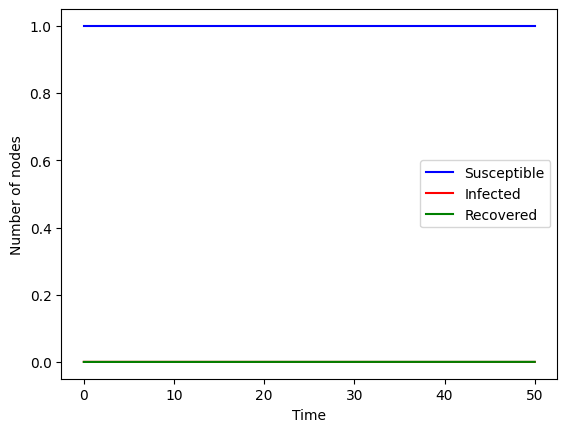

In [60]:
model = ThresholdModel(G)
theta, beta, gamma = 3, 0.4, 0.05
model.set_parameters(theta, beta, gamma)

n = 10
p = 0.1
initial_infected = bottom_betweenness_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))

Final susceptible: 2408
Final infected: 936
Final recovered: 53395


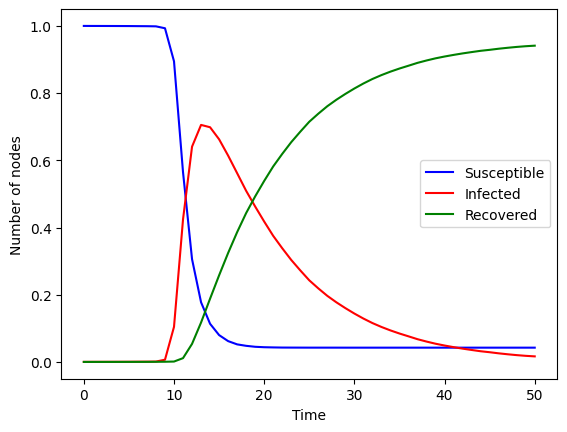

In [27]:
model = ClassicalModel(G)
theta, beta, gamma = 3, 0.5, 0.1
model.set_parameters(theta, beta, gamma)

n = 10
p = 0.1
initial_infected = bottom_betweenness_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))